In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\sanka\OneDrive\Desktop\datasets\mnist_train.csv")
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
print(data)

[[5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]


In [4]:
np.random.shuffle(data)

In [5]:
data.shape

(60000, 785)

In [6]:

data1 = data[0:1000].T  
data_yv = data1[0]  
data_xv = data1[1:785]  

data_xv = data_xv / 255

data2 = data[1000:].T  
Y_train = data2[0]  
X_train = data2[1:] 

X_train = X_train / 255


print("Shape of data_xv:", data_xv.shape) 
print("Shape of data_yv:", data_yv.shape)  
print("Shape of X_train:", X_train.shape)  
print("Shape of Y_train:", Y_train.shape)  

Shape of data_xv: (784, 1000)
Shape of data_yv: (1000,)
Shape of X_train: (784, 59000)
Shape of Y_train: (59000,)


In [7]:
#X_train.shape

In [7]:
Y_train1 = Y_train.copy()

In [8]:
Y_train.shape

(59000,)

In [9]:
def init_params():
    W1 = np.random.rand(10, 784) * np.sqrt(1 / 784)  # Xavier Initialization
    b1 = np.zeros((10, 1))
    W2 = np.random.rand(10, 10) * np.sqrt(1 / 10)
    b2 = np.zeros((10, 1)) 
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expz = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Stability trick
    return expz / np.sum(expz, axis=0, keepdims=True)

def forward_pass(X, W1, W2, b1, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2  # No softmax here, we'll apply it in loss function
    return A1, Z2, Z1

def cross_entropy_loss(Z2, Y):
    """Compute cross-entropy loss using integer labels."""
    m = Y.shape[0]
    probs = softmax(Z2)  # Apply softmax here
    log_probs = -np.log(probs[Y, np.arange(m)])  # Only pick correct class probabilities
    return np.sum(log_probs) / m

def ReLU_derivative(Z):
    return Z > 0

def backward_pass(X, Y, W1, W2, b1, b2, Z1, Z2, A1, m):
    probs = softmax(Z2)  # Compute probabilities
    probs[Y, np.arange(m)] -= 1  # Subtract 1 from correct class
    probs /= m  # Normalize

    dC2_W2 = np.dot(probs, A1.T)
    dC2_b2 = np.sum(probs, axis=1, keepdims=True)
    dC1 = np.dot(W2.T, probs) * ReLU_derivative(Z1)
    dC1_dW1 = np.dot(dC1, X.T)
    dC1_db1 = np.sum(dC1, axis=1, keepdims=True)

    return dC2_W2, dC2_b2, dC1_dW1, dC1_db1

def gradient_descent(X, Y, W1, b1, W2, b2, alpha, epochs):
    m = X.shape[1]
    for i in range(epochs):
        A1, Z2, Z1 = forward_pass(X, W1, W2, b1, b2)
        loss = cross_entropy_loss(Z2, Y)  # Use new loss function
        dC2_W2, dC2_b2, dC1_dW1, dC1_db1 = backward_pass(X, Y, W1, W2, b1, b2, Z1, Z2, A1, m)

        W1 -= alpha * dC1_dW1
        b1 -= alpha * dC1_db1
        W2 -= alpha * dC2_W2
        b2 -= alpha * dC2_b2

        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")

    return W1, b1, W2, b2


In [14]:
Y_train = Y_train.T

In [12]:
W1, b1, W2, b2 = init_params()
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, W1, b1, W2, b2, 0.1, 1000)

def predict(X, W1, W2, b1, b2):
    _, Z2, _ = forward_pass(X, W1, W2, b1, b2)  
    prediction = np.argmax(Z2, axis=0) 
    return prediction

def get_accuracy(prediction, Y):
    Y_size = Y.size
    accuracy = np.sum(prediction == Y) / Y_size
    return accuracy 

prediction = predict(X_train, W1, W2, b1, b2)
accuracy = get_accuracy(prediction, Y_train)

print(f"Training Accuracy: {accuracy:.4f}")
print(f"Prediction : {prediction}")
print(f"accuracy : {accuracy}")

Epoch 0, Loss: 2.3932
Epoch 100, Loss: 0.7365
Epoch 200, Loss: 0.4873
Epoch 300, Loss: 0.4118
Epoch 400, Loss: 0.3766
Epoch 500, Loss: 0.3558
Epoch 600, Loss: 0.3414
Epoch 700, Loss: 0.3307
Epoch 800, Loss: 0.3220
Epoch 900, Loss: 0.3147
Training Accuracy: 0.9134
Prediction : [7 8 0 ... 2 7 9]
accuracy : 0.9134067796610169


In [25]:
import matplotlib.pyplot as plt

def test_prediction(index, X, Y):
    image = X[:, index].reshape(28, 28) #here we are selecting an image via index and reshaiin it in 28x28
    prediction = predict(X[:, index, None], W1, W2, b1, b2) # none is needed here so as to make it 2D matrix which sycnoizizes with the image.
    Label = Y[index]
    print(f"Label : {Label}")
    print(f"Prediction : {prediction}")
    plt.imshow(image, cmap="gray")
    plt.show()
    return prediction, Label

In [14]:
test = pd.read_csv(r"C:\Users\sanka\OneDrive\Desktop\datasets\mnist_test.csv")
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data_test = np.array(test)
data_test = data_test.T
data_test.shape

(785, 10000)

In [17]:
data_test_Y = data_test[0]
data_test_X = data_test[1:]

In [18]:
data_test_X.shape

(784, 10000)

Label : 4
Prediction : [4]


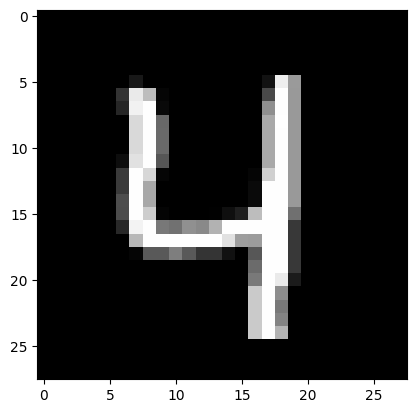

Label : 6
Prediction : [6]


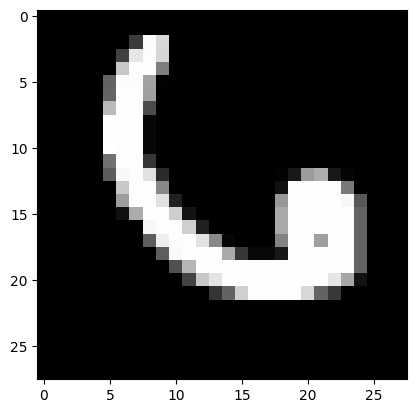

Label : 2
Prediction : [2]


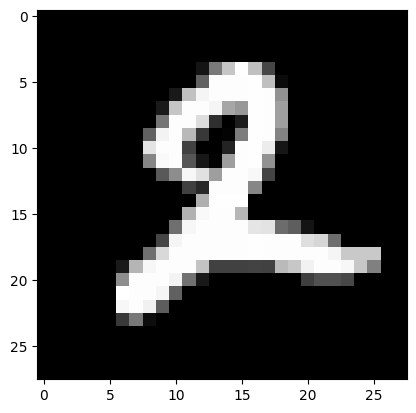

Label : 1
Prediction : [1]


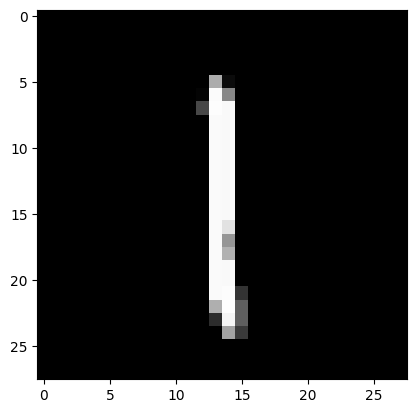

Label : 7
Prediction : [7]


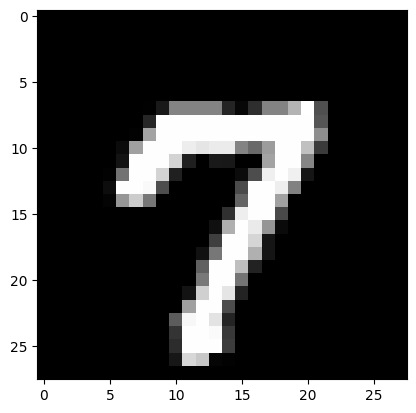

Label : 3
Prediction : [3]


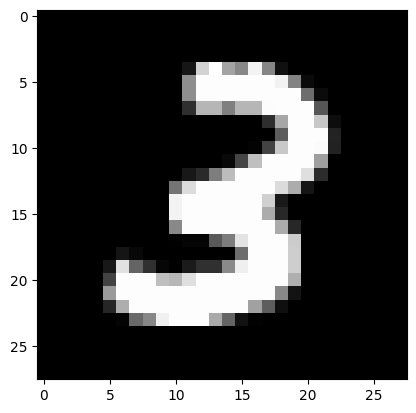

Label : 0
Prediction : [0]


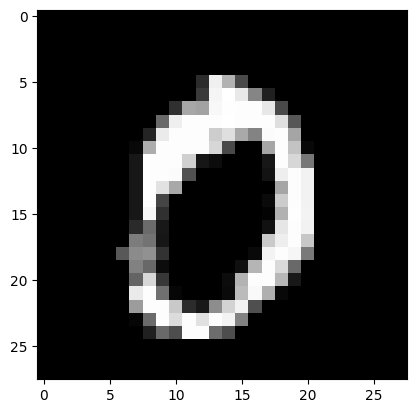

Label : 3
Prediction : [2]


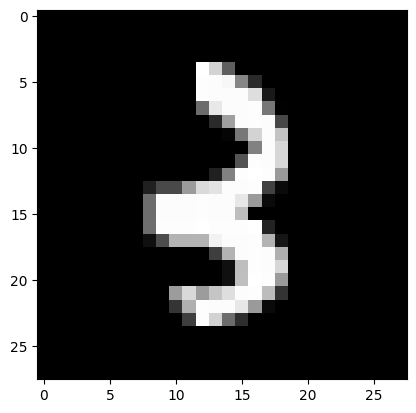

Label : 1
Prediction : [1]


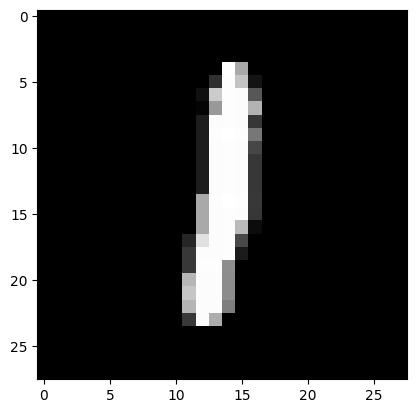

Label : 0
Prediction : [0]


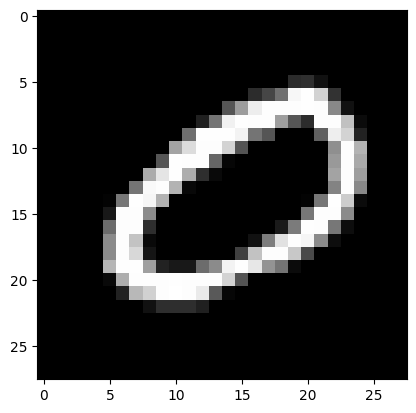

In [27]:
random_indices = np.random.randint(0, data_test_X.shape[1], size=10)
for index in random_indices:
    test_prediction(index, data_test_X, data_test_Y)